In [1]:
"""THIS JUPYTER NOTEBOOK IS USED TO CONVERT THE PREDICTED LABELS FOR EACH TEST IMAGE INTO 
A BLACK-AND-WHITE IMAGE. THE PREDICTED IMAGES WILL BE SAVED INTO THE FOLDER 'PREDICTIONS' 
WITH THEIR NUMBER RESPECTIVELY"""

"THIS JUPYTER NOTEBOOK IS USED TO CONVERT THE PREDICTED LABELS FOR EACH TEST IMAGE INTO \nA BLACK-AND-WHITE IMAGE. THE PREDICTED IMAGES WILL BE SAVED INTO THE FOLDER 'PREDICTIONS' \nWITH THEIR NUMBER RESPECTIVELY"

In [2]:
import tensorflow as tf
from utils.helpers import *
from cnn_model import CnnModel
import tensorflow.keras as keras
import sys
import matplotlib.pyplot as plt
import numpy as np

In [4]:
PATH_WEIGHTS_PATCH = '../models/weightsPatch4.h5'
PATH_WEIGHTS = '../models/weightsOrig.h5'

PATH_UNET = '../models/unet.h5'
PATH_TEST_DATA = '../data/test_set_images/'
PATH_PREDICTION_DIR = '../data/predictions/'
PATH_SUBMISSION = '../final_submission.csv'
TEST_SIZE = 2

image_filenames_test = [PATH_TEST_DATA + 'test_' + str(i + 1) + '/' + 'test_' +
                        str(i + 1) + '.png' for i in range(TEST_SIZE)]




In [5]:
def predicted_BW(model, image_filename):
    """FOR VISUALIZATION"""

    image = load_image(image_filename)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    #print("loaded test image after reshape",image.shape)
    
    
    # PREDICT LABELS
    labels = model.predict(image)
    #print("labelsshape1",labels.shape)
    labels = labels.reshape(-1)
    #print("labelsshape2",labels.shape)
    
    return labels

In [7]:
#instanciate model
cnn = CnnModel()
cnn.load_weights(PATH_WEIGHTS_PATCH)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 18, 18, 64)        4864      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 18, 18, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 9, 9, 128)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 128)         0         
__________

In [8]:
labels = []
for i in range(TEST_SIZE):
    image_filenames = image_filenames_test[i]
    labels.append(predicted_BW(cnn, image_filenames))

Predicting images..
Predicting images..


In [19]:
# Convert array of labels to an image
def label_to_img(imgwidth, imgheight, w, h, labels,threshold):
    array_labels = np.zeros([imgwidth, imgheight])
    idx = 0
    for i in range(0, imgheight, h):
        for j in range(0, imgwidth, w):
            if labels[idx] > threshold:  # bgrd: 1 heißt background also weiß
                l = 1
            else:
                l = 0
            array_labels[j:j+w, i:i+h] = l
            idx = idx + 1
    return array_labels

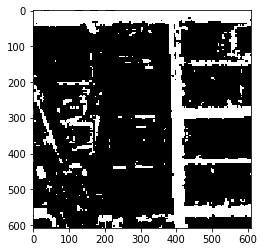

In [20]:
jo=label_to_img(608,608,4,4,labels[1],0.5)
plt.imshow(jo,cmap="Greys_r")

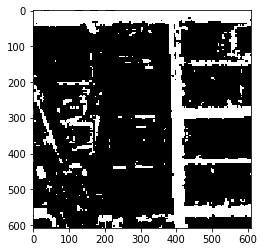

In [22]:
jo=label_to_img(608,608,4,4,labels[1],0.1)
plt.imshow(jo,cmap="Greys_r")

In [67]:
plt.imsave(PATH_PREDICTION_DIR + 'pred_patch_10', jo,cmap="Greys_r")

In [42]:
for i in range(TEST_SIZE):
    plt.imsave(PATH_PREDICTION_DIR + 'pred_patch_'+str(1),label_to_img(608,608,16,16,labels[i]),cmap="Greys_r")

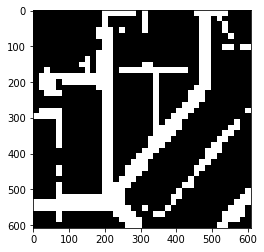

In [ ]:
# todo: notebook, that involves predictions path to save all the predicted images!!!